In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
measures = {}
def get_data(filename):
    dataset = pd.read_csv(filename)
    return dataset
def rolmean(dataset, hrw, fs):
    mov_avg = dataset['hart'].rolling(int(hrw*fs)).mean()
    avg_hr = (np.mean(dataset.hart))
    mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
    mov_avg = [x*1.2 for x in mov_avg]
    dataset['hart_rollingmean'] = mov_avg
def detect_peaks(dataset):
    window = []
    peaklist = []
    listpos = 0
    for datapoint in dataset.hart:
        rollingmean = dataset.hart_rollingmean[listpos]
        if (datapoint < rollingmean) and (len(window) < 1):
            listpos += 1
        elif (datapoint > rollingmean):
            window.append(datapoint)
            listpos += 1
        else:
            maximum = max(window)
            beatposition = listpos - len(window) + (window.index(max(window)))
            peaklist.append(beatposition)
            window = []
            listpos += 1
    measures['peaklist'] = peaklist
    measures['ybeat'] = [dataset.hart[x] for x in peaklist]
def calc_RR(dataset, fs):
    RR_list = []
    peaklist = measures['peaklist']
    cnt = 0
    while (cnt < (len(peaklist)-1)):
        RR_interval = (peaklist[cnt+1] - peaklist[cnt])
        ms_dist = ((RR_interval / fs) * 1000.0)
        RR_list.append(ms_dist)
        cnt += 1
    measures['RR_list'] = RR_list
def calc_bpm():
    RR_list = measures['RR_list']
    measures['bpm'] = 60000 / np.mean(RR_list)
def plotter(dataset, title):
    peaklist = measures['peaklist']
    ybeat = measures['ybeat']
    plt.title(title)
    plt.plot(dataset.hart, alpha=0.5, color='blue', label="raw signal")
    plt.plot(dataset.hart_rollingmean, color ='green', label="moving average")
    plt.scatter(peaklist, ybeat, color='red', label="average: %.1f BPM" %measures['bpm'])
    plt.legend(loc=4, framealpha=0.6)
    plt.show()
def process(dataset, hrw, fs): #Remember; hrw was the one-sided window size (we used 0.75) and fs was the sample rate (file is recorded at 100Hz)
    rolmean(dataset, hrw, fs)
    detect_peaks(dataset)
    calc_RR(dataset, fs)
    calc_bpm()
    plotter(dataset, "My Heartbeat Plot")



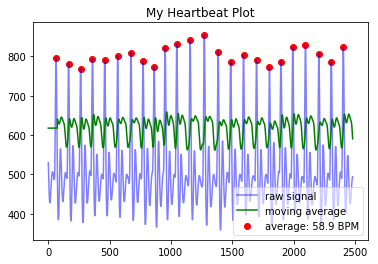

dict_keys(['peaklist', 'ybeat', 'RR_list', 'bpm'])


In [2]:
#final code

import heartbeat as hb #Assuming we named the file 'heartbeat.py'
dataset = hb.get_data("data.csv")
hb.process(dataset, 0.75, 100)
#We have imported our Python module as an object called 'hb'
#This object contains the dictionary 'measures' with all values in it
#Now we can also retrieve the BPM value (and later other values) like this:
bpm = hb.measures['bpm']
#To view all objects in the dictionary, use "keys()" like so:
print (hb.measures.keys())
%matplotlib inline
